In [1]:
# a script to address the questions in section 2

In [2]:
import pandas as pd

In [3]:
incidents = pd.read_csv('Incidents_Responded_to_by_Fire_Companies.csv')
cols = pd.read_excel('OPEN_DATA_FIRE_INCIDENTS_FILE_DESCRIPTION.xls')

/home/david/anaconda3/envs/explore/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
incidents.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",...,10454.0,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55672692,818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,...,10036.0,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",...,11418.0,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,...,11103.0,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55672697,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,...,11385.0,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cols.head()

,Column Name,Description
0,IM_INCIDENT_KEY,Unique identifier for each incident which serv...
1,FIRE_BOX,Identifier for the Fire Alarm Box area in whic...
2,INCIDENT_TYPE_DESC,The code and description of the incident categ...
3,INCIDENT_DATE_TIME,The date and time that the incident was logged...
4,ARRIVAL_DATE_TIME,The date and time that the first unit arrived ...


In [6]:
cols.iloc[2].Description

'The code and description of the incident category type'

In [7]:
# answer 1
mostCommon = incidents['INCIDENT_TYPE_DESC'].mode()

nRows_mode = len(incidents[incidents['INCIDENT_TYPE_DESC'].str.contains(mostCommon[0])])
nRows_all = len(incidents)

print(nRows_mode/nRows_all)

0.35988610259500914


In [8]:
# answer 2
falseCalls = incidents[incidents['INCIDENT_TYPE_DESC'].str.contains('710 - Malicious, mischievous false call, other')]

falseStaten = len(falseCalls[falseCalls['BOROUGH_DESC'].str.contains('3 - Staten Island')])
falseManh = len(falseCalls[falseCalls['BOROUGH_DESC'].str.contains('1 - Manhattan')])

allStaten = len(incidents[incidents['BOROUGH_DESC'].str.contains('3 - Staten Island')])
allManh = len(incidents[incidents['BOROUGH_DESC'].str.contains('1 - Manhattan')])

staten_FCR = falseStaten/allStaten
manh_FCR = falseManh/allManh

print(staten_FCR/manh_FCR)

1.6030401196910262


<ipython-input-9-5e6df5fe9ae3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookingFires['ts_hourly'] = pd.to_datetime(cookingFires['INCIDENT_DATE_TIME']).dt.floor('H').dt.hour


(array([18]),)


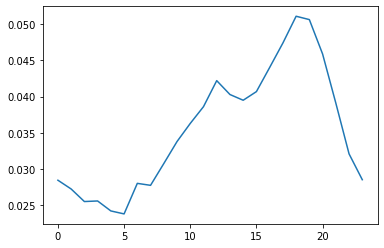

In [9]:
# answer 3
import matplotlib.pyplot as plt
import numpy as np

cookingFires = incidents[incidents['INCIDENT_TYPE_DESC'].str.contains('113 - Cooking fire, confined to container')]

cookingFires['ts_hourly'] = pd.to_datetime(cookingFires['INCIDENT_DATE_TIME']).dt.floor('H').dt.hour
incidents['ts_hourly'] = pd.to_datetime(incidents['INCIDENT_DATE_TIME']).dt.floor('H').dt.hour

incPerHour = incidents['ts_hourly'].value_counts(sort=False)
cfPerHour = cookingFires['ts_hourly'].value_counts(sort=False)
proportionPerHour = cfPerHour/incPerHour

plt.plot(proportionPerHour)
h = np.where(proportionPerHour==np.max(proportionPerHour))

print(h)

In [10]:
buildingFires = incidents[incidents['INCIDENT_TYPE_DESC'].str.contains('111 - Building fire')]
smokeScares = incidents[incidents['INCIDENT_TYPE_DESC'].str.contains('651 - Smoke scare, odor of smoke')]

ratio = buildingFires['UNITS_ONSCENE'].mean() / smokeScares['UNITS_ONSCENE'].mean()
print(ratio)

2.801157225753703


In [11]:
# buildingFires.columns

In [12]:
responseTimes = pd.to_datetime(buildingFires['ARRIVAL_DATE_TIME']) - pd.to_datetime(buildingFires['INCIDENT_DATE_TIME'])
print(responseTimes.quantile(.75) / np.timedelta64(1, 'm'))

4.166666666666667


In [13]:
populationByZip = pd.read_csv('zipcodes.csv', thousands=',')

# clean it up
rows = populationByZip[populationByZip['zipcode'].str.contains('and')]
populationByZip = populationByZip[~populationByZip['zipcode'].isin(rows['zipcode'])] #cut bad rows

for r in range(len(rows)):
    z = rows.iloc[r,1].replace(',','').replace('and','').split('�')# split the zips
    for zz in z:
        if zz != 'and' and zz != '':
            rank = int(rows.iloc[r,0].split('�')[0].replace(',',''))
            pop = int(rows.iloc[r,2])
            df = pd.DataFrame(zip([rank], [int(zz)], [int(pop)]),columns=list(populationByZip.columns))
            populationByZip = populationByZip.append(df)     



zips = buildingFires['ZIP_CODE'].astype(int).unique()
v=[]
for z in zips:
    res = populationByZip.loc[populationByZip['zipcode'].astype(int)==z]
    res2 = buildingFires.loc[buildingFires['ZIP_CODE'].astype(int)==z]
    if len(res)>0:
        v.append([int(res['population'].values), \
                  int(res['zipcode'].values), \
                  len(res2)])
        
correlation_xy=np.corrcoef(np.stack(v)[:,0],np.stack(v)[:,2])
r_squared = correlation_xy[0,1]**2
print(r_squared)

0.6259016201995691


In [51]:
present = incidents['CO_DETECTOR_PRESENT_DESC']=='Yes'
notPresent = incidents['CO_DETECTOR_PRESENT_DESC']=='No'
allCo = np.logical_or(incidents['CO_DETECTOR_PRESENT_DESC']=='No', incidents['CO_DETECTOR_PRESENT_DESC']=='Yes')

(array([2., 0., 0., ..., 0., 0., 0.]),
 array([   0,    1,    2, ..., 9997, 9998, 9999]),
 <BarContainer object of 9999 artists>)

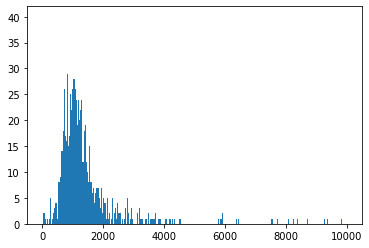

In [40]:
plt.hist(incidents['TOTAL_INCIDENT_DURATION'][present].values,bins=range(10000))

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([   0,    1,    2, ..., 9997, 9998, 9999]),
 <BarContainer object of 9999 artists>)

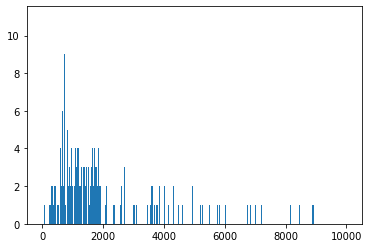

In [41]:
plt.hist(incidents['TOTAL_INCIDENT_DURATION'][notPresent].values,bins=range(10000))


In [46]:
from scipy.stats import chisquare


observed = np.mean(incidents['TOTAL_INCIDENT_DURATION'][notPresent]>60*60)
expected = np.mean(incidents['TOTAL_INCIDENT_DURATION'][allCo]>60*60)

chi_squared_stat = (((observed-expected)**2)/expected).sum()

IndexError: Boolean index has wrong length: 2 instead of 2518758

0          False
1          False
2          False
3          False
4          False
           ...  
2518753    False
2518754    False
2518755    False
2518756    False
2518757    False
Name: CO_DETECTOR_PRESENT_DESC, Length: 2518758, dtype: bool